In [1]:
import os
import sys

basePath = '.'

module_path = os.path.abspath(os.path.join(basePath))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from typing import List
import numpy as np
from TP5.autoencoder_utils import to_bits, labeled_scatter, print_bit_array, generate, add_noise, noisy_copy
from TP5.fonts import font2, font2_lables, font1, font1_lables, font3_lables, font3
from TP5.MLP import Network

In [3]:
training_points = to_bits(font3)

layers: List[int] = [25,15,5, 2, 5,15,25]
layers.append(np.size(training_points, axis=1))
layers.insert(0, np.size(training_points, axis=1))

epoch = 5000
eta = 0.0005

neural_network: Network = Network(np.size(training_points, 1), layers, np.size(training_points, 1), 1e-6)

In [4]:
count = 35
start = 0
noise_copies = 5
noise_factor = 0.85

training_points, training_values = add_noise(to_bits(font2)[start:start+count], noise_factor, noise_copies)

Loss: 0.044776887616734096 at epoch 500
Loss: 0.014022228338032156 at epoch 1000
Loss: 0.005436534390314937 at epoch 1500
Loss: 0.0032906022024827195 at epoch 2000
Loss: 0.002351108147247886 at epoch 2500
Loss: 0.0018314456121134373 at epoch 3000
Loss: 0.0014641467408425452 at epoch 3500
Loss: 0.0012627277895436747 at epoch 4000
Loss: 0.0010565332033245867 at epoch 4500
Loss: 0.0009153070232062095 at epoch 5000
Minimum loss:  0.0009153070232062095


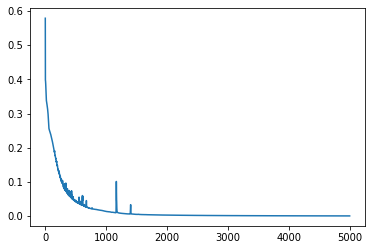

In [5]:
neural_network.train(training_points, training_values, epoch, eta,5, 0.5,10, 0.1, True)

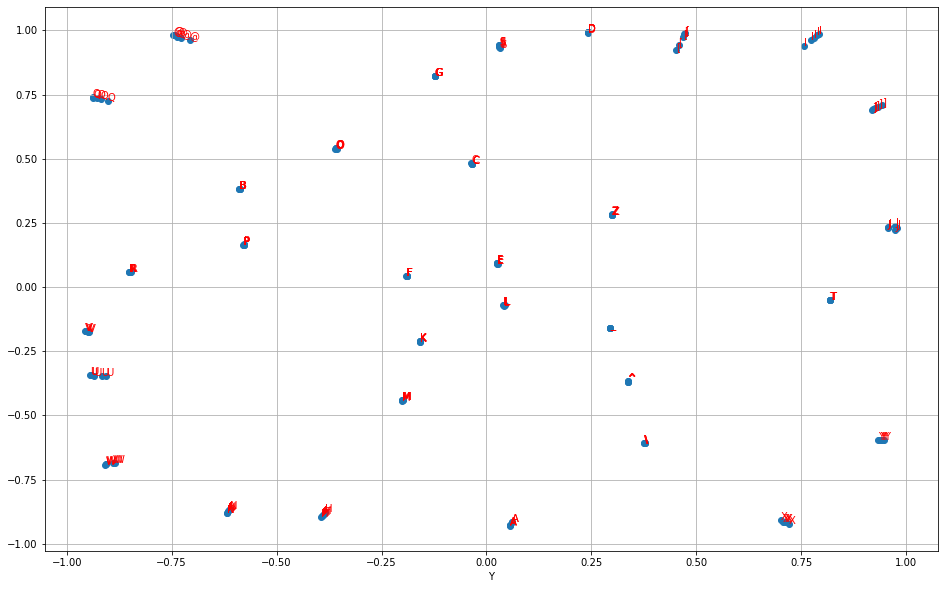

In [6]:
z_values: np.ndarray = np.empty((np.size(training_points, 0), 2))
predictions: np.ndarray = np.empty(training_points.shape)

for i in range(np.size(training_points, 0)):
    predictions[i], w = neural_network.predict(training_points[i])
    z_values[i] = neural_network.activations[len(layers)//2 + 1]

labeled_scatter(z_values[:, 0], z_values[:, 1], labels=np.repeat(font3_lables[start:start+count], noise_copies))

In [7]:
for i in range(len(predictions)):
    if not (predictions[i] * training_points[i//noise_copies * noise_copies] >= 0).all():
        print_bit_array(predictions[i])
        print_bit_array(training_points[i//noise_copies * noise_copies])
        print('\n\n')
    

In [26]:
index = 1
point = training_points[index * noise_copies]
noisy_point = noisy_copy(training_points[index*noise_copies], noise_factor)

print('Point:')
print_bit_array(point)
print('Noisy Point:')
print_bit_array(noisy_point)
prediction, w = neural_network.predict(noisy_point)
print('Prediction:')
print_bit_array(prediction)

Point:
  *  
 * * 
*   *
*   *
*****
*   *
*   *
Noisy Point:
 **  
 *** 
**  *
* * *
*****
*   *
   * 
Prediction:
  *  
   * 
 *  *
  * *
 *** 
    *
*   *
